# Interactively plot PCA using a variety of options for viewing different conditions, etc. 
- If at all possible, use the 'decomposition' package instead: https://github.com/byee4/decomposition

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
counts = pd.read_table('counts.txt',index_col=0, skiprows=1)
def trunc(name):
    return name.replace('.polyATrim.adapterTrim.rmRep.sorted.rg.bam','').replace('_R1_001','')# [:name.find('_')]

def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.ix[:,5:]
    lengths = featureCountsTable['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)
counts.head()

,Chr,Start,End,Strand,Length,analysis/rnae_v6/GSF973-Hundley-SarahD-1_S1_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-2_S2_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-3_S3_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-4_S4_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-5_S5_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-6_S6_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam,analysis/rnae_v6/GSF973-Hundley-SarahD-7_S7_R1_001.polyATrim.adapterTrim.rmRep.sorted.rg.bam
Geneid,,,,,,,,,,,,
WBGene00014450,MtDNA,1,55,+,55,0,0,0,0,0,0,0
WBGene00014451,MtDNA,58,111,+,54,0,0,0,0,0,0,0
WBGene00010957,MtDNA,113,549,+,437,0,0,0,0,0,0,0
WBGene00010958,MtDNA,549,783,+,235,0,0,0,0,0,0,0
WBGene00014452,MtDNA,785,840,+,56,0,0,0,0,0,0,0


In [3]:
rpkms = counts_to_rpkm(counts)
"""
If we want a threshold.
"""
rpkm_threshold = 20
num_samples = rpkms.shape[1]*rpkm_threshold
rpkms = rpkms[rpkms.sum(axis=1)>=num_samples]
rpkms.to_csv('test_featurecounts_rpkms.txt',sep='\t')

rpkms = rpkms+1
rpkms_log2 = np.log2(rpkms)
rpkms_log2.to_csv('test_featurecounts_rpkms_log2.txt',sep='\t')
rpkms_log2.columns = [trunc(col) for col in rpkms_log2.columns]
print(rpkms_log2.shape)
rpkms_log2.head()

(4949, 7)


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,analysis/rnae_v6/GSF973-Hundley-SarahD-1_S1,analysis/rnae_v6/GSF973-Hundley-SarahD-2_S2,analysis/rnae_v6/GSF973-Hundley-SarahD-3_S3,analysis/rnae_v6/GSF973-Hundley-SarahD-4_S4,analysis/rnae_v6/GSF973-Hundley-SarahD-5_S5,analysis/rnae_v6/GSF973-Hundley-SarahD-6_S6,analysis/rnae_v6/GSF973-Hundley-SarahD-7_S7
Geneid,,,,,,,
WBGene00235261,4.275842,4.460305,3.786077,4.760919,3.547772,5.608447,4.215057
WBGene00006599,7.777288,6.912299,7.846066,7.588371,7.851043,8.097417,7.831468
WBGene00017929,5.817383,5.679917,6.142512,5.992530,5.833958,5.919014,5.741897
WBGene00017926,8.277134,8.505674,7.311959,8.476350,7.930108,7.790595,8.252537
WBGene00000897,6.056277,5.443641,5.475346,5.429188,5.687493,5.844641,5.611514


In [4]:
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(rpkms_log2.T)

In [5]:
print(len(sklearn_pca.components_[1])) # number of genes in feature table
pc_components = pd.DataFrame(index = rpkms.index, columns=['PC1','PC2'])
for i,j in zip(rpkms.index, np.abs(sklearn_pca.components_[0])):
    pc_components.ix[i,'PC1'] = j
for i,j in zip(rpkms.index, np.abs(sklearn_pca.components_[1])):
    pc_components.ix[i,'PC2'] = j

4949


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [6]:
pc_components.sort_values(by='PC1',ascending=False).to_csv('PC_components.txt', sep='\t')

In [7]:
pca = pd.DataFrame(sklearn_transf)
pca.index = rpkms_log2.columns
pca.to_csv('test_pcomp.txt',sep='\t')
pca.head()

,0,1
analysis/rnae_v6/GSF973-Hundley-SarahD-1_S1,-10.911733,-22.843611
analysis/rnae_v6/GSF973-Hundley-SarahD-2_S2,-30.209394,25.384075
analysis/rnae_v6/GSF973-Hundley-SarahD-3_S3,30.566106,7.941172
analysis/rnae_v6/GSF973-Hundley-SarahD-4_S4,12.805873,3.479648
analysis/rnae_v6/GSF973-Hundley-SarahD-5_S5,11.495330,8.223389


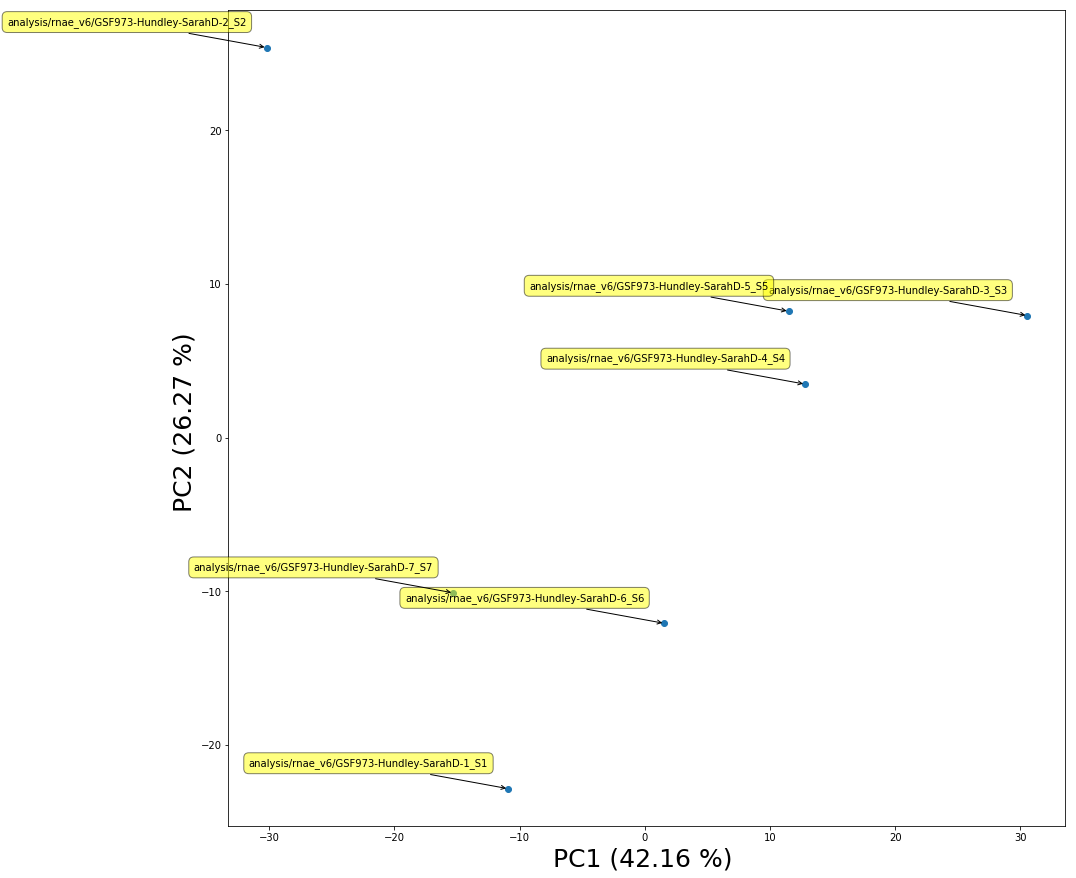

In [8]:
ax = plt.figure(figsize=(15,15)) # .gca(projection='3d')

labels = rpkms_log2.columns
plt.scatter(pca[0], pca[1])

for label, x, y in zip(labels, pca[0], pca[1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.xlabel('PC1 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[0]*100), fontsize=25)
plt.ylabel('PC2 (%.2f %%) '%(sklearn_pca.explained_variance_ratio_[1]*100), fontsize=25)
plt.show()